In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default')

sns.set(style="whitegrid")

pd.options.display.float_format = '{:20,.2f}'.format

dataframe = pd.read_csv('Descargas/fiuba-trocafone-tp1-final-set/events.csv')
dataframe.columns

/home/euge/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version'],
      dtype='object')

# 1. Compración por marca

In [46]:
dataframe['marca'], dataframe['modelo'] = dataframe['model'].str.split(' ',1).str
dataframe['marca'] = dataframe['marca'].apply(lambda marca: 'Apple' if (marca == 'iPhone' or marca == 'iPad') else marca)

prod1=dataframe[dataframe['event'] == 'conversion']
conversion = prod['marca'].value_counts()

prod2=dataframe[dataframe['event'] == 'checkout']
checkout = prod['marca'].value_counts()


In [33]:
tabla1 = pd.concat([conversion],axis=1)
tabla1.columns = ['conversion']
tabla1['conversion_log'] = np.log(tabla1["conversion"]+1)

tabla2 = pd.concat([checkout],axis=1)
tabla2.columns = ['checkout']
tabla2['checkout_log'] = np.log(tabla2["checkout"]+1)

tabla = pd.concat([tabla2['checkout_log'],tabla1['conversion_log']],axis=1)
tabla

,checkout_log,conversion_log
Apple,9.56,5.78
Asus,4.16,1.10
LG,6.33,3.04
Lenovo,5.61,2.71
Motorola,8.23,5.01
Quantum,3.00,nan
Samsung,9.60,6.46
Sony,5.39,3.18


Text(0.5,0,'Marca')

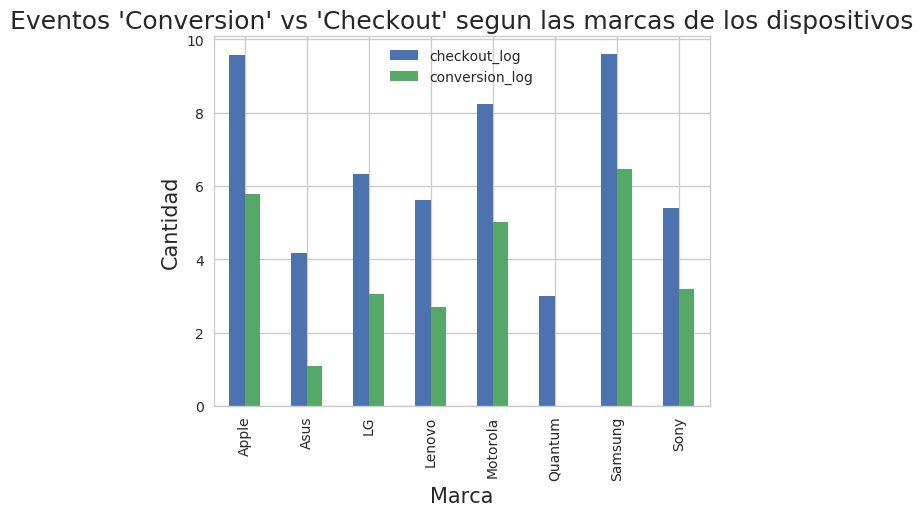

In [36]:
'''
Grafico de barras de ventas por marca de dispositivo.
'''
g = tabla.plot.bar()
g.set_title("Eventos 'Conversion' vs 'Checkout' segun las marcas de los dispositivos", fontsize=18)
g.set_ylabel("Cantidad", fontsize=15)
g.set_xlabel("Marca", fontsize=15)

In [51]:
dataframe['marca'], dataframe['modelo'] = dataframe['model'].str.split(' ',1).str
prod=dataframe[dataframe['event'] == 'conversion']
prod['marca'] = prod['marca'].apply(lambda marca: 'Apple' if (marca == 'iPhone' or marca == 'iPad') else marca)
marcas = prod['marca'].value_counts()

/home/euge/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0,0.5,'Marca')

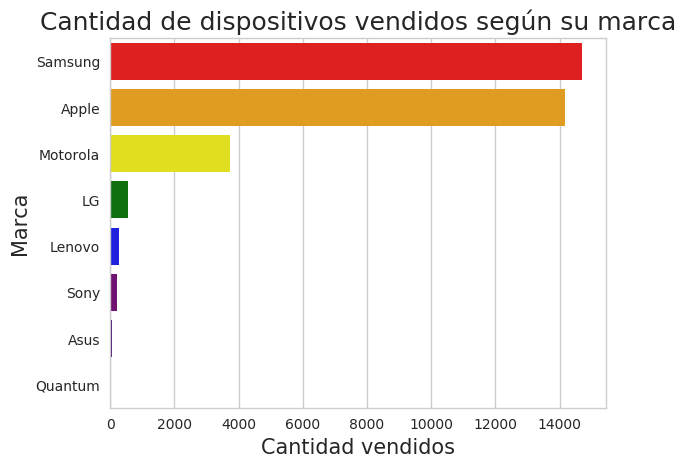

In [52]:
'''
Grafico de barras de ventas por marca de dispositivo.
'''
g = sns.barplot(x=conversion.values, y=conversion.index, orient='h',palette=['red','orange','yellow','green','blue','purple','indigo'])
g.set_title("Cantidad de dispositivos vendidos según su marca", fontsize=18)
g.set_xlabel("Cantidad vendidos", fontsize=15)
g.set_ylabel("Marca", fontsize=15)

In [53]:
conversion

Samsung     14707
Apple       14154
Motorola     3738
LG            562
Lenovo        272
Sony          218
Asus           63
Quantum        19
Name: marca, dtype: int64

Text(0.5,0,'Modelo')

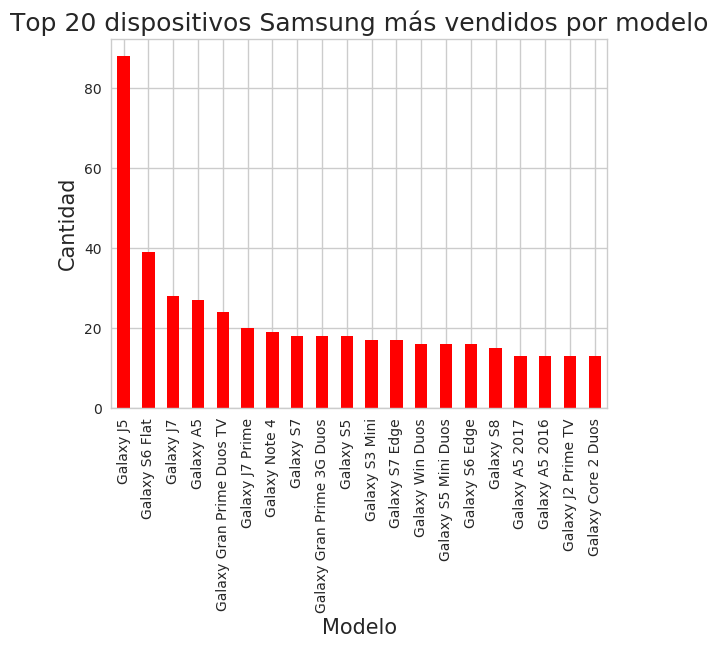

In [54]:
'''
Grafico de barras de top 20 dispositivos Samsung mas vendidos.
'''
SamsungVendidos = prod1.loc[prod.marca == 'Samsung',:]['modelo'].value_counts().head(20)
SamsungVendidos

g = SamsungVendidos.plot.bar(color=['red'])
g.set_title("Top 20 dispositivos Samsung más vendidos por modelo", fontsize=18)
g.set_ylabel("Cantidad", fontsize=15)
g.set_xlabel("Modelo", fontsize=15)

Text(0.5,0,'Modelo')

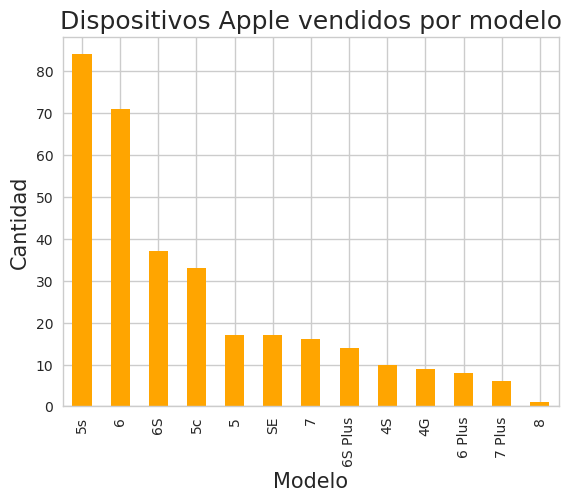

In [55]:
'''
Grafico de barras de dispositivos Apple mas vendidos.
'''

AppleVendidos = prod.loc[prod.marca == 'Apple',:]['modelo'].value_counts()
AppleVendidos

g = AppleVendidos.plot.bar(color=['orange'])
g.set_title("Dispositivos Apple vendidos por modelo", fontsize=18)
g.set_ylabel("Cantidad", fontsize=15)
g.set_xlabel("Modelo", fontsize=15)

Text(0.5,0,'Modelo')

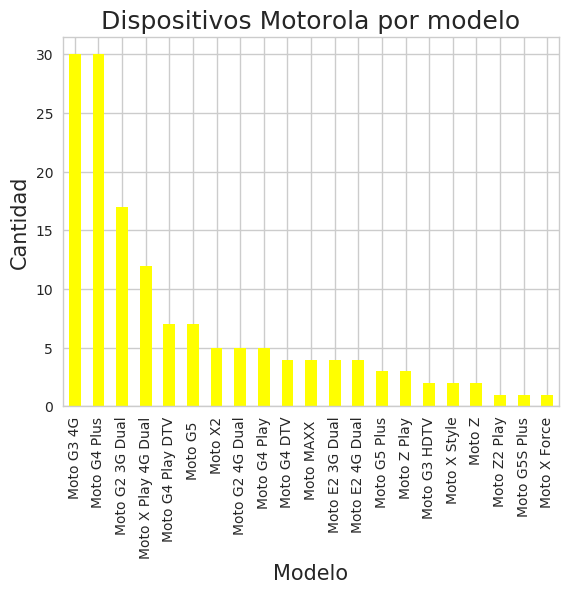

In [56]:
'''
Grafico de barras de dispositivos Motorola mas vendidos.
'''
MotorolaVendidos = prod.loc[prod.marca == 'Motorola',:]['modelo'].value_counts()
MotorolaVendidos

g = MotorolaVendidos.plot.bar(color=['yellow'])
g.set_title("Dispositivos Motorola por modelo", fontsize=18)
g.set_ylabel("Cantidad", fontsize=15)
g.set_xlabel("Modelo", fontsize=15)

# 2. Comparación por fecha

In [57]:
'''
Agego las columnas año, mes y dia.
'''
dataframe['año'],dataframe['mes'],dataframe['dia']= dataframe['timestamp'].str.split(' ').str[0].str.split('-').str

# 3. Comparación por ubicación

Text(0,0.5,'Pais')

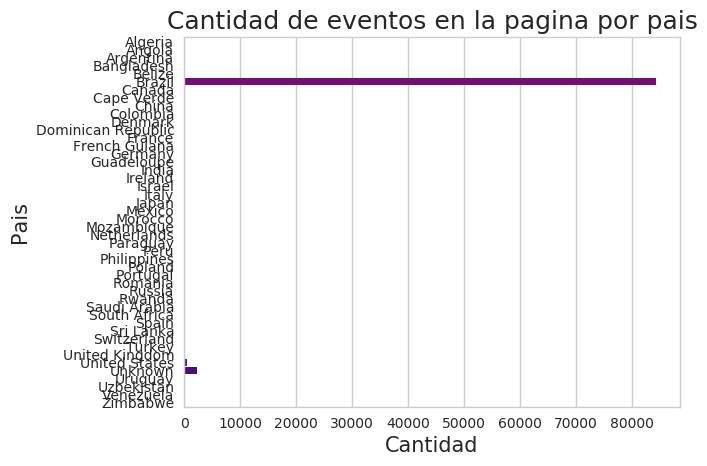

In [58]:
'''
Grafico de barras de eventos en la pagina por pais.
'''

#Hay que ver como hacer que se vea mas lindo.
ingresoPorPais = dataframe.filter(items = ['country','event']).groupby('country').count()['event']
g = sns.barplot(x=ingresoPorPais.values, y=ingresoPorPais.index, orient='h',palette=['red','orange','yellow','green','blue','purple','indigo'])
g.set_title("Cantidad de eventos en la pagina por pais", fontsize=18)
g.set_xlabel("Cantidad", fontsize=15)
g.set_ylabel("Pais", fontsize=15)

Text(0,0.5,'Region')

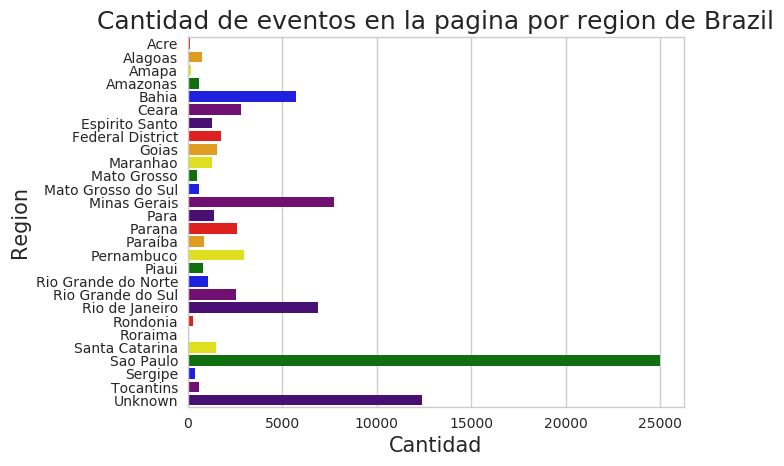

In [59]:
'''
Grafico de barras de eventos en la pagina por region en Brazil.
'''
ingresoPorRegionEnBrazil = dataframe.filter(items = ['country','region','event']).loc[dataframe['country'] == 'Brazil'].groupby('region').count()['event']

g = sns.barplot(x=ingresoPorRegionEnBrazil.values, y=ingresoPorRegionEnBrazil.index, orient='h',palette=['red','orange','yellow','green','blue','purple','indigo'])
g.set_title("Cantidad de eventos en la pagina por region de Brazil", fontsize=18)
g.set_xlabel("Cantidad", fontsize=15)
g.set_ylabel("Region", fontsize=15)